Данный ноутбук является кратким отчётом по заданию 5. Само задание написано на С++, Python используется только для построения графиков и только в пределах ноутбука.

Решение задания находится в файле main.cpp, файл для сборки под cmake: CMakeLists.txt

В данном случае рассматривались 3 детектора особых точек: SIFT, BRISK и Harris

Поскольку у детектора Harris несколько другая структора, то при подсчёте его дескрипторов так же использовался дефолтный детектор SIFT.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**График repeatability**

Repeatability считалась следующим образом. В проходе по всем изображениям на каждом детектировались особые точки. Для каждой новой особой точки среди уже известных точек находились совпадения с помощью knnMatch из opencv. После этого совпадения с distance большим некоторого threshold отсеивались и итоговый результат считался новым списком совпадений. Не попавшие в данный список точки добавлялись в список уникальных уже известных точек.

$repeatability = \frac{\text{Число точек, найденных на изображении}}{\text{Число уникальных точек после прохода по всем изображениям}}$

Здесь distance - расстояние между дескрипторами особых точек. Для разных детекторов в силу их особенностей (см. документацию opencv) необходимо использовать разные нормы при подсчёте таких расстояний. Как следствие для различных детекторов использовались разные значения threshold, что могло повлиять на конеяный результат.

In [2]:
sift_repeatability = np.array([0.445763, 0.444915, 0.423729, 0.449153, 
                               0.425424, 0.411864, 0.414407, 0.39322, 
                               0.426271, 0.411864, 0.412712, 0.416102])
brisk_repeatability = np.array([0.968944, 0.915114, 0.89441, 0.991718,
                                0.942029, 0.927536, 0.952381, 0.906832, 
                                0.908903, 0.805383, 0.857143, 0.877847])
harris_repeatability = np.array([0.373318, 0.411718, 0.680918, 0.910135, 
                                 0.729612, 0.575218, 0.766033, 0.566112, 
                                 0.986936, 0.46635, 0.742676, 0.781869])
images = np.arange(12)

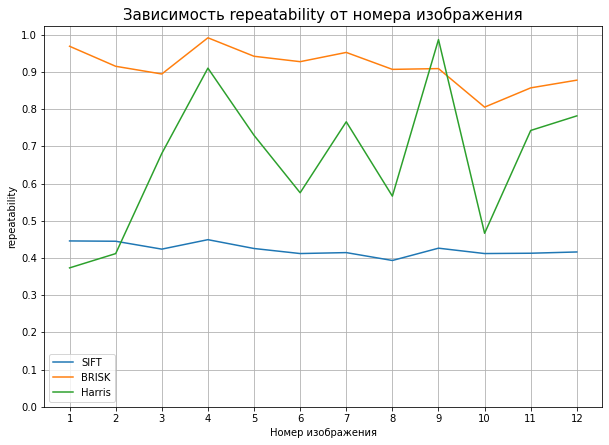

In [3]:
plt.figure(figsize = (10, 7))
plt.plot(images + 1, sift_repeatability, label = 'SIFT')
plt.plot(images + 1, brisk_repeatability, label = 'BRISK')
plt.plot(images + 1, harris_repeatability, label = 'Harris')
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(np.linspace(1, 12, 12))
plt.legend(loc = 3)
plt.title('Зависимость repeatability от номера изображения', fontsize = 15)
plt.xlabel('Номер изображения', fontsize = 10)
plt.ylabel('repeatability', fontsize = 10)
plt.grid()
plt.show()

**Время работы для каждого детектора**

При подсчёте времени работы учитывается только время затраченное на детекцию, вычисление дескрипторов происходит отдельно. Времена с каждого изображения делятся на число точек, найденных на изображении. Итоговый результат для всех изображений получим ещё одним усреднением здесь. 

In [17]:
time_df = pd.DataFrame(columns = ['детектор', 
            'среднее время для одной точки в микросекундах'])
time_df['детектор'] = ['SIFT', 'BRISK', 'Harris']

time_sift = np.array([
    0.000212106, 0.000152756, 0.000176286, 0.000147143, 0.000165116, 
    0.000169767, 0.000166282, 0.000171683, 0.000166521, 0.000161759, 
    0.000172715, 0.000161971]) * 10**(6)
time_brisk = np.array([
    2.50769, 1.76267, 2.24352, 1.50438, 1.74308, 1.49978, 2.62522, 1.75959, 
    1.7287, 1.77943, 1.80894, 1.57406]) * 10
time_harris = np.array([
    2.51538, 1.25096, 1.36512, 0.54067, 0.65274, 0.824501, 0.663049, 1.13217, 
    0.65343, 1.37776, 0.869403, 0.819747]) 

In [18]:
time_df['среднее время для одной точки в микросекундах'] = [
    np.mean(time_sift), np.mean(time_brisk), np.mean(time_harris)]

In [19]:
display(time_df)

,детектор,среднее время для одной точки в микросекундах
0,SIFT,168.675417
1,BRISK,18.780883
2,Harris,1.055411
